In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline

In [2]:
pwd

'C:\\Users\\M QASIM'

In [7]:
#Reading Dataset
ds = pd.read_csv(r"E:\NAVTCCAI\MyWork\models\Multiple-Linear-Regression-Co2-Emission-Prediction\FuelConsumptionCo2.csv")

#Printing head data
ds.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [16]:
#Data filtering
cds = ds[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

#Data head printing
cds.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


Text(0, 0.5, 'Co2Emissions')

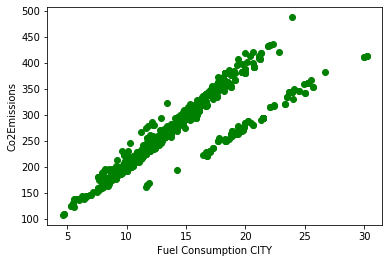

In [29]:
plt.scatter(cds.FUELCONSUMPTION_CITY,cds.CO2EMISSIONS,color='green')
plt.xlabel('Fuel Consumption CITY')
plt.ylabel('Co2Emissions')
#plt.show()

In [56]:
#Test Train Split
msk = np.random.rand(len(ds)) < 0.75
train = cds[msk]
test = cds[~msk]

#print(train.head())
#print(test.head())

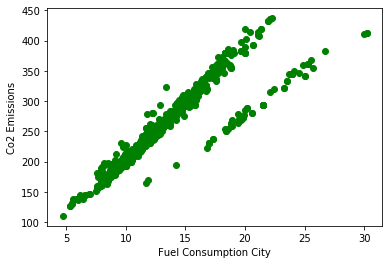

In [60]:
#DIsplay Train Data
plt.scatter(train.FUELCONSUMPTION_CITY,train.CO2EMISSIONS,color='green')
plt.xlabel('Fuel Consumption City')
plt.ylabel('Co2 Emissions')
plt.show()

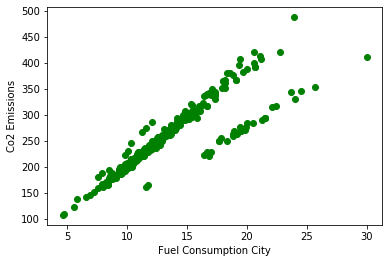

In [61]:
#Display Test Data
plt.scatter(test.FUELCONSUMPTION_CITY,test.CO2EMISSIONS,color='green')
plt.xlabel('Fuel Consumption City')
plt.ylabel('Co2 Emissions')
plt.show()

In [108]:
#Model Training 1
from sklearn import linear_model
reg = linear_model.LinearRegression()
x_train = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])

#Feeding the Test Data
reg.fit(x_train,y_train)
print("Intercept ", reg.intercept_)
print("Coefficient ", reg.coef_)

Intercept  [65.54801469]
Coefficient  [[10.67847973  7.07028519  9.92675255]]


In [114]:
#Model 1 Prediction and Oridnary Least Square Error
y_hat = reg.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x_test = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])

print("Residual sum of squares: %.2f" %np.mean((y_hat - y_test) ** 2))
print("Variance score: %.2f" %reg.score(x_test,y_test))

Residual sum of squares: 633.25
Variance score: 0.84


ValueError: x and y must have same first dimension, but have shapes (781, 3) and (2,)

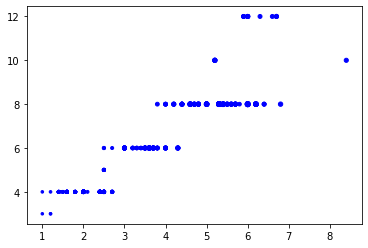

In [123]:
plt.scatter(train.ENGINESIZE,train.CYLINDERS,train.FUELCONSUMPTION_COMB, color='blue')
plt.plot(x_train, reg.intercept_ + reg.coef_[0][1]*x_train[0][1:] + reg.coef_[0][2]*x_train[0][2:], '-r')

In [93]:
#Model Training 2
from sklearn import linear_model
reg = linear_model.LinearRegression()
x_train = np.asanyarray(train[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])

#Feeding the Data          
reg.fit(x_train,y_train)
print("Intercpet ",reg.intercept_) 
print("Coefficeints ",reg.coef_)
                       

Intercpet  [78.93889149]
Coefficeints  [[17.86898455  8.08684216  1.1591464 ]]


In [100]:
#Model 2 Prediction and Ordinary Least Square Error

y_hat = reg.predict(test[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x_test = np.asanyarray(test[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])

#Printing the Error
print("Residual sum of squares: %.2f" %np.mean((y_hat - y_test) ** 2))
print("Variance score: %.2f" %reg.score(x_test,y_test))

Residual sum of squares: 666.39
Variance score: 0.84
